# ABU量化系统使用文档 

<center>
        <img src="./image/abu_logo.png" alt="" style="vertical-align:middle;padding:10px 20px;"><font size="6" color="black"><b>第9节 港股市场的回测</b></font>
</center>

-----------------

作者: 阿布

阿布量化版权所有 未经允许 禁止转载

[abu量化系统github地址](https://github.com/bbfamily/abu) (您的star是我的动力！)

[本节ipython notebook](https://github.com/bbfamily/abu/tree/master/abupy_lecture)

上一节讲解的是A股市场的回测，本节讲解港股市场的回测示例。

首先导入abupy中本节使用的模块：

In [1]:
# 基础库导入

from __future__ import print_function
from __future__ import division

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy

# 使用沙盒数据，目的是和书中一样的数据环境
abupy.env.enable_example_env_ipython()

enable example env will only read RomDataBu/df_kl.h5


买入因子，卖出因子等依然使用相同的设置，如下所示：

In [2]:
from abupy import AbuFactorAtrNStop, AbuFactorPreAtrNStop, AbuFactorCloseAtrNStop, AbuFactorBuyBreak, ABuProgress
from abupy import abu, tl, get_price, ABuSymbolPd, EMarketTargetType, AbuMetricsBase, AbuHkUnit, six

# 设置初始资金数
read_cash = 1000000

# 买入因子依然延用向上突破因子
buy_factors = [{'xd': 60, 'class': AbuFactorBuyBreak},
               {'xd': 42, 'class': AbuFactorBuyBreak}]

# 卖出因子继续使用上一节使用的因子
sell_factors = [
    {'stop_loss_n': 1.0, 'stop_win_n': 3.0,
     'class': AbuFactorAtrNStop},
    {'class': AbuFactorPreAtrNStop, 'pre_atr_n': 1.5},
    {'class': AbuFactorCloseAtrNStop, 'close_atr_n': 1.5}
]

### 1. 港股市场的回测示例

择时股票池使用沙盒缓存数据中的如下股票：

#### 港股市场：

* 中国恒大(hk03333)
* 腾讯控股(hk00700)
* 长城汽车(hk02333)
* 中国信达(hk01359)
* 复星国际(hk00656)
* 金山软件(hk03888)
* 中国平安(hk02318)
* 恒生指数(hkHSI)

代码如下所示：

In [3]:
# 择时股票池
choice_symbols = ['hk03333', 'hk00700', 'hk02333', 'hk01359', 'hk00656', 'hk03888', 'hk02318']

与A股市场类似首先将abupy量化环境设置为港股，代码如下所示：

In [4]:
# 设置市场类型为港股
abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_HK

In [5]:
abu_result_tuple, kl_pd_manger = abu.run_loop_back(read_cash,
                                                   buy_factors,
                                                   sell_factors,
                                                   n_folds=6,
                                                   choice_symbols=choice_symbols)
ABuProgress.clear_output()

买入后卖出的交易数量:202
买入后尚未卖出的交易数量:3
胜率:50.4950%
平均获利期望:12.9899%
平均亏损期望:-5.9130%
盈亏比:2.4770
策略收益: 85.8217%
基准收益: 18.5928%
策略年化收益: 14.6923%
基准年化收益: 3.1830%
策略买入成交比例:90.7317%
策略资金利用率比例:32.5890%
策略共执行1472个交易日


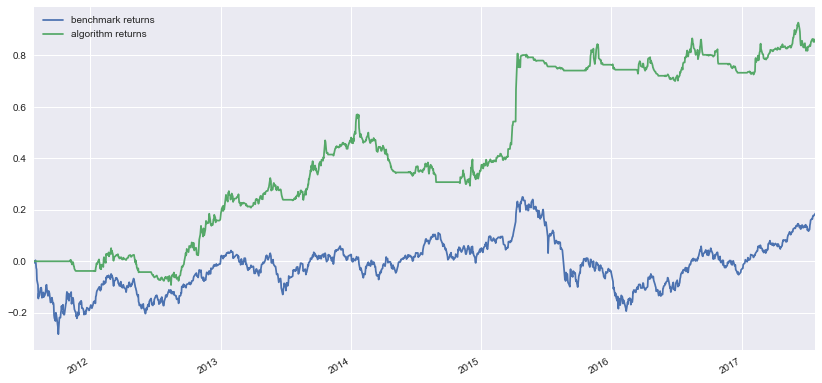

In [6]:
AbuMetricsBase.show_general(*abu_result_tuple, only_show_returns=True)

从上收益曲线可以看到在大概在2015年上旬的有一次收益猛烈的拉升出现，下面输出top10笔收益，代码如下所示：

In [7]:
orders_pd = abu_result_tuple.orders_pd
top_10 = orders_pd.sort_values(by='profit')[::-1].dropna(subset=['sell_price'])[:10]
top_10.filter(['symbol', 'buy_date', 'buy_price', 'sell_date', 'sell_price', 'profit'])

,symbol,buy_date,buy_price,sell_date,sell_price,profit
2015-03-17,hk03333,20150317,3.4450,20150422,5.1250,97440.0
2015-03-03,hk03333,20150303,3.4600,20150422,5.1250,94905.0
2015-03-10,hk00656,20150310,12.7400,20150422,18.6000,90830.0
2014-11-27,hk02318,20141127,32.3125,20150116,43.6500,68025.0
2012-07-30,hk02333,20120730,8.7200,20121122,12.4875,67815.0
2012-08-22,hk03888,20120822,3.6150,20121015,4.9000,65535.0
2012-01-31,hk00700,20120131,37.6000,20120419,47.6200,53106.0
2013-08-05,hk03888,20130805,15.0700,20131021,22.2500,50260.0
2013-08-05,hk03888,20130805,15.0700,20131021,22.2500,50260.0
2012-12-13,hk00656,20121213,4.6150,20130121,5.6550,44720.0


从输出可以清晰的看出，top3的高收益交易都发生在2015年3月份买入，4月份卖出，3笔收益都非常高。

结合HSI基准在3-4月之间也有一个拉升，这里的收益曲线猛烈拉升也可以理解了。

在《量化交易之路》中写过：很多时候我们编写出一个策略后发现预期收益非常高，遇到这样的情况，如果你是认真的，那就应该考虑怎么降低收益，降低的不仅是收益也是风险，对应的提高的将是系统的稳定性。

有很多朋友问怎样才能降低风险，提高稳定性，比如上面的回测，是不是要把3-4月份这次收益猛烈的拉升滤除才叫降低风险呢？

当然不是，上面的3-4月份拉升收益是顺势的收益，如果要把这段过滤将是逆势行为。

有些朋友问降低风险是不是需要通过买对冲来实现？

其实也不建议个人投资者买对冲，因为对冲的产品一般都是和时间相关的，比如期权，期货，增加一个时间维度会将整个交易复杂度提升几个数量级，并不建议一般交易者进行这种对冲，特别是以股票为主要投资对象的一般交易者（但是可以在策略中做相同品种的相关性对冲，在之后的章节会有完成相关性策略示例）。

我认为最适合一般投资者的的提高稳定性的方法就是降低交易频率，比如在《量化交易之路》主要讲解的ump裁判拦截，主要就是通过学习策略中的失败交易，从不同角度进行学习交易特点，指导决策拦截交易，拦截了大量的交易可以节省佣金，更重大的意义在于边裁避免了重大的风险。

本节讲解在不考虑使用ump系统的情况下，示例如何通过硬编码策略来降低交易频率，提高系统的稳定性。

###  2. 优化策略，提高系统的稳定性

下面的示例将在突破策略AbuFactorBuyBreak基础上进行降低交易频率，提高系统的稳定性处理。

首先看下面使用AbuTLine.show_least_valid_poly示例，通过get_price获取港股大盘HSI一个月收盘价格数据，然后使用AbuTLine.show_least_valid_poly进行poly判断，它返回的结果是检测至少poly次拟合曲线可以代表原始曲线y的走势，如下所示显示1次
曲线即可以代表20160301-20160401这一个月的拟合走势，如下所示:

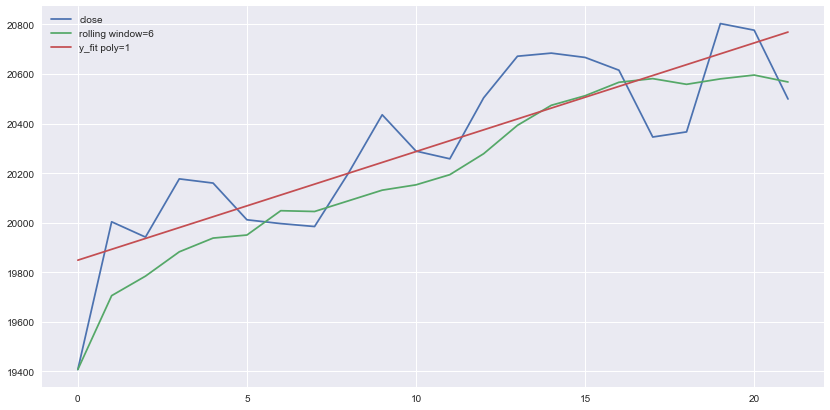

metrics_func rolling_mean=186.61431257386164, metrics_func y_fit=183.13826895414556
least poly = 1, zoom=False


1

In [8]:
hsi = get_price('hkHSI', start_date='20160301', end_date='20160401')
tl.AbuTLine(hsi.price, 'HSI').show_least_valid_poly()

验证poly（默认＝1）次多项式拟合回归的趋势曲线是否能代表原始曲线y的走势主要代码以及思路如下所示：

    def valid_poly(y, poly=1, zoom=False, show=True, metrics_func=metrics_rmse):
        """
        验证poly（默认＝1）次多项式拟合回归的趋势曲线是否能代表原始曲线y的走势，
        基础思路：
                 1. 对原始曲线y进行窗口均线计算，窗口的大小＝ math.ceil(len(y) / 4)
                 eg：
                    原始y序列＝504 －> rolling_window = math.ceil(len(y) / 4) = 126
                 2. 通过pd_rolling_mean计算出均线的值y_roll_mean
                 3  使用metrics_func方法度量原始y值和均线y_roll_mean的距离distance_mean
                 3. 通过计算regress_xy_polynomial计算多项式拟合回归的趋势曲线y_fit
                 4. 使用metrics_func方法度量原始y值和拟合回归的趋势曲线y_fit的距离distance_fit
                 5. 如果distance_fit <= distance_mean即代表拟合曲线可以代表原始曲线y的走势
        :param y: 原始可迭代序列
        :param poly: 几次拟合参数，int
        :param zoom: 是否对y数据进行缩放
        :param show: 是否原始曲线y，均线，以及拟合曲线可视化
        :param metrics_func: 度量始y值和均线y_roll_mean的距离和原始y值和
                             拟合回归的趋势曲线y_fit的距离的方法，默认使用metrics_rmse
        :return: 是否poly次拟合曲线可以代表原始曲线y的走势
        """
        valid = False
        x = np.arange(0, len(y))
        if zoom:
            # 将y值 zoom到与x一个级别，不可用ABuScalerUtil.scaler_xy, 因为不管x > y还y > x都拿 x.max() / y.max()
            zoom_factor = x.max() / y.max()
            y = zoom_factor * y
        # 对原始曲线y进行窗口均线计算，窗口的大小＝ math.ceil(len(y) / 4)
        rolling_window = math.ceil(len(y) / 4)
        # 通过pd_rolling_mean计算出均线的值y_roll_mean
        y_roll_mean = pd_rolling_mean(y, window=rolling_window, min_periods=1)
        # 使用metrics_func方法度量原始y值和均线y_roll_mean的距离distance_mean
        distance_mean = metrics_func(y, y_roll_mean, show=False)

        # 通过计算regress_xy_polynomial计算多项式拟合回归的趋势曲线y_fit, 外面做zoom了所以zoom=False
        y_fit = regress_xy_polynomial(x, y, poly=poly, zoom=False, show=False)
        # 使用metrics_func方法度量原始y值和拟合回归的趋势曲线y_fit的距离distance_fit
        distance_fit = metrics_func(y, y_fit, show=False)
        # 如果distance_fit <= distance_mean即代表拟合曲线可以代表原始曲线y的走势
        if distance_fit <= distance_mean:
            valid = True
        if show:
            # 原始曲线y，均线，以及拟合曲线可视化
            plt.plot(x, y)
            plt.plot(x, y_roll_mean)
            plt.plot(x, y_fit)
            plt.legend(['close', 'rolling window={}'.format(rolling_window), 'y_fit poly={}'.format(poly)])
            plt.show()
            log_func('metrics_func rolling_mean={}, metrics_func y_fit={}'.format(distance_mean, distance_fit))
        return valid
        
具体更多详情请阅读源代码AbuTLine

如上20160301-20160401使用一次拟合曲线即可以代表原始曲线，下面向前推一个月20160128－20160229：

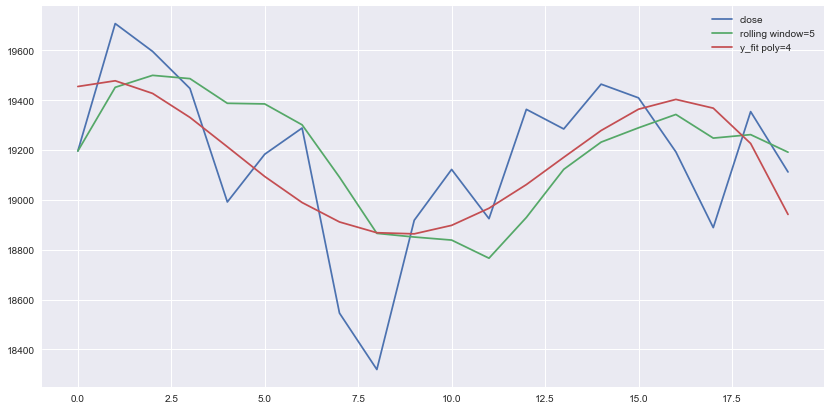

metrics_func rolling_mean=267.2156304197113, metrics_func y_fit=250.7485519077053
least poly = 4, zoom=False


4

In [9]:
hsi = get_price('hkHSI', start_date='20160128', end_date='20160229')
tl.AbuTLine(hsi.price, 'HSI').show_least_valid_poly()

如上结果显示至少需要最少4次以上的拟合才可以代表原始曲线，实际上poly的次数越大，越代表此段周期内波动比较大，从上可视化图也可清晰看出，上面需要4次拟合才能代表的走势明显处在震荡走势中。

下面根据上面这个判断依据编写策略基本，策略和之前一直使用的AbuFactorBuyBreak基本一样，不同的是实现fit_month方法(fit_month即在回测策略中每一个月执行一次的方法), 在fit_month中使用show_least_valid_poly计算这个月大盘价格走势的least poly值，如果大于一个阀值比如2，就说明最近大盘走势震荡，那么就封锁交易，直到在fit_month中计算出的least poly值小于阀值，解锁交易，代码实现如下所示：

In [16]:
from abupy import AbuFactorBuyXD, BuyCallMixin

class AbuSDBreak(AbuFactorBuyXD, BuyCallMixin):
    def _init_self(self, **kwargs):
        super(AbuSDBreak, self)._init_self(**kwargs)
        # 外部可以设置poly阀值，self.poly在fit_month中和每一个月大盘计算的poly比较，若是大盘的poly大于poly认为走势震荡
        self.poly = kwargs.pop('poly', 2)
        # 是否封锁买入策略进行择时交易
        self.lock = False

    def fit_month(self, today):
        # fit_month即在回测策略中每一个月执行一次的方法
        # 策略中拥有self.benchmark，即交易基准对象，AbuBenchmark实例对象，benchmark.kl_pd即对应的市场大盘走势
        benchmark_df = self.benchmark.kl_pd
        # 拿出大盘的今天
        benchmark_today = benchmark_df[benchmark_df.date == today.date]
        if benchmark_today.empty:
            return 0
        # 要拿大盘最近一个月的走势，准备切片的start，end
        end_key = int(benchmark_today.iloc[0].key)
        start_key = end_key - 20
        if start_key < 0:
            return False

        # 使用切片切出从今天开始向前20天的数据
        benchmark_month = benchmark_df[start_key:end_key + 1]
        # 通过大盘最近一个月的收盘价格做为参数构造AbuTLine对象
        benchmark_month_line = AbuTLine(benchmark_month.close, 'benchmark month line')
        # 计算这个月最少需要几次拟合才能代表走势曲线
        least = benchmark_month_line.show_least_valid_poly(show=False)

        if least >= self.poly:
            # 如果最少的拟合次数大于阀值self.poly，说明走势成立，大盘非震荡走势，解锁交易
            self.lock = False
        else:
            # 如果最少的拟合次数小于阀值self.poly，说明大盘处于震荡走势，封锁策略进行交易
            self.lock = True

    def fit_day(self, today):
        if self.lock:
            # 如果封锁策略进行交易的情况下，策略不进行择时
            return None

        # 今天的收盘价格达到xd天内最高价格则符合买入条件
        if today.close == self.xd_kl.close.max():
            return self.buy_tomorrow()
    
# 通过import的方式导入AbuSDBreak，因为在windows系统上，启动并行后，在ipython notebook中定义的类会在子进程中无法找到
from abupy import AbuSDBreak

下面重新组成买入因子字典，使用刚刚编写的买入策略AbuSDBreak，突破周期还是60，42：

In [11]:
buy_factors = [{'xd': 60, 'class': AbuSDBreak}, 
               {'xd': 42, 'class': AbuSDBreak}]

In [12]:
# 使用run_loop_back运行策略
abu_result_tuple, kl_pd_manger = abu.run_loop_back(read_cash,
                                                   buy_factors,
                                                   sell_factors,
                                                   choice_symbols=choice_symbols,
                                                   n_folds=6)
ABuProgress.clear_output()

买入后卖出的交易数量:122
买入后尚未卖出的交易数量:3
胜率:61.4754%
平均获利期望:11.5062%
平均亏损期望:-4.7367%
盈亏比:3.9707
策略收益: 91.2822%
基准收益: 18.5928%
策略年化收益: 15.6271%
基准年化收益: 3.1830%
策略买入成交比例:98.4000%
策略资金利用率比例:22.8984%
策略共执行1472个交易日


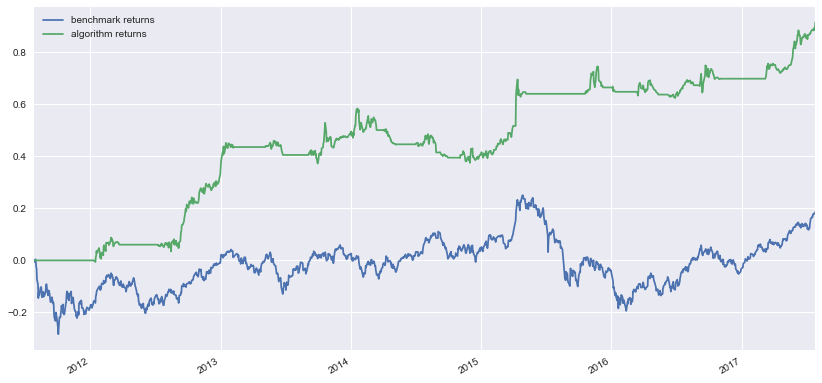

In [13]:
AbuMetricsBase.show_general(*abu_result_tuple, only_show_returns=True)

直观上的收益曲线变的平缓了些，交易数量减少了接近40％。

使用AbuSDBreak，降低交易频率，提高系统的稳定性处理的回测结果：

- 买入后卖出的交易数量:123
- 胜率:60.9756%
- 平均获利期望:12.3589%
- 平均亏损期望:-4.6619%
- 盈亏比:4.2144
- 策略收益: 100.1270%
- 基准收益: 18.5928%
- 策略年化收益: 17.1413%
- 基准年化收益: 3.1830%
- 策略买入成交比例:98.4127%
- 策略资金利用率比例:22.3742%
- 策略共执行1472个交易日

本节时使用AbuFactorBuyBreak的回测结果：

- 买入后卖出的交易数量:201
- 胜率:50.7463%
- 平均获利期望:13.2619%
- 平均亏损期望:-5.9121%
- 盈亏比:2.6158
- 策略收益: 93.7512%
- 基准收益: 18.5928%
- 策略年化收益: 16.0498%
- 基准年化收益: 3.1830%
- 策略买入成交比例:91.1765%
- 策略资金利用率比例:32.3410%
- 策略共执行1472个交易日

上面这种提高系统稳定性的方法需要在策略添加一些交易规则，阀值进行交易的筛选过滤，后面的章节会示例使用abupy中ump裁判拦截系统，其优点是：

1. 不需要在具体策略中硬编码
2. 不需要人工设定阀值，即且使得代码逻辑清晰
3. 分离基础策略和策略优化监督模块，提高灵活度和适配性
4. 发现策略中隐藏的交易策略问题
5. 可以通过不断的学习新的交易数据（给每一个裁判看更多的比赛录像，提高比赛录像水准），提高拦截水平

读者可自行使用上面的AbuSDBreak做为上一节A股回测的策略，重新进行回测，从结果你可以发现与本节港股的回测类似，交易频率降低，交易成功概率提高。

### 3 将优化策略的'策略'做为类装饰器进行封装

在上面说过使用ump模块的优点有个是：分离基础策略和策略优化监督模块，提高灵活度和适配性，

实际上上面使用的AbuSDBreak中的优化策略可以封装在一个装饰器类中，之后编写的所有策略都可以选择是否通过这个类装饰器进行策略优化，代码如下所示：

In [15]:
class AbuLeastPolyWrap(object):
    """
        做为买入因子策略装饰器封装show_least_valid_poly对大盘震荡大的情况下封锁交易
    """

    def __call__(self, cls):
        """只做为买入因子策略类的装饰器"""
        
        if isinstance(cls, six.class_types):
            # 只做为类装饰器使用
            
            init_self = cls._init_self
            org_fit_day = cls.fit_day
            
            # fit_month不是必须实现的
            org_fit_month = getattr(cls, 'fit_month', None)
            def init_self_wrapped(*args, **kwargs):
                # 拿出被装饰的self对象
                warp_self = args[0]
                # 外部可以设置poly阀值，self.poly在fit_month中和每一个月大盘计算的poly比较，
                # 若是大盘的poly大于poly认为走势震荡
                warp_self.poly = kwargs.pop('poly', 2)
                # 是否封锁买入策略进行择时交易
                warp_self.lock = False
                # 调用原始的_init_self
                init_self(*args, **kwargs)
                    
            def fit_day_wrapped(*args, **kwargs):
                # 拿出被装饰的self对象
                warp_self = args[0]
                if warp_self.lock:
                    # 如果封锁策略进行交易的情况下，策略不进行择时
                    return None
                return org_fit_day(*args, **kwargs)
                                
            def fit_month_wrapped(*args, **kwargs):
                warp_self = args[0]
                today = args[1]
                # fit_month即在回测策略中每一个月执行一次的方法
                # 策略中拥有self.benchmark，即交易基准对象，AbuBenchmark实例对象，benchmark.kl_pd即对应的市场大盘走势
                benchmark_df = warp_self.benchmark.kl_pd
                # 拿出大盘的今天
                benchmark_today = benchmark_df[benchmark_df.date == today.date]
                if benchmark_today.empty:
                    return 0
                # 要拿大盘最近一个月的走势，准备切片的start，end
                end_key = int(benchmark_today.iloc[0].key)
                start_key = end_key - 20
                if start_key < 0:
                    return 0

                # 使用切片切出从今天开始向前20天的数据
                benchmark_month = benchmark_df[start_key:end_key+1]
                # 通过大盘最近一个月的收盘价格做为参数构造AbuTLine对象
                benchmark_month_line = tl.AbuTLine(benchmark_month.close, 'benchmark month line')
                # 计算这个月最少需要几次拟合才能代表走势曲线
                least = benchmark_month_line.show_least_valid_poly(show=False)

                if least >= warp_self.poly:
                    # 如果最少的拟合次数大于阀值self.poly，说明走势成立，大盘非震荡走势，解锁交易
                    warp_self.lock=False
                else:
                    # 如果最少的拟合次数小于阀值self.poly，说明大盘处于震荡走势，封锁策略进行交易
                    warp_self.lock=True
                    
                if org_fit_month is not None:
                    return org_fit_month(*args, **kwargs)

            cls._init_self = init_self_wrapped
            init_self_wrapped.__name__ = '_init_self'
                                
            cls.fit_day = fit_day_wrapped
            fit_day_wrapped.__name__ = 'fit_day'
            
            cls.fit_month = fit_month_wrapped
            fit_month_wrapped.__name__ = 'fit_month'

            return cls
        else:
            raise TypeError('AbuLeastPolyWrap just for class warp')

下面编写一个很简单的策略，连续涨两天就买入股票，示例AbuLeastPolyWrap的使用：

In [17]:
from abupy import AbuFactorBuyTD, BuyCallMixin

@AbuLeastPolyWrap()
class AbuTwoDayBuy(AbuFactorBuyTD, BuyCallMixin):
    """示例AbuLeastPolyWrap，混入BuyCallMixin，即向上突破触发买入event"""

    def _init_self(self, **kwargs):
        """简单示例什么都不编写了"""
        pass

    def fit_day(self, today):
        """
        针对每一个交易日拟合买入交易策略，今天涨，昨天涨就买
        :param today: 当前驱动的交易日金融时间序列数据
        :return:
        """
        # 今天的涨幅
        td_change = today.p_change
        # 昨天的涨幅
        yd_change = self.yesterday.p_change

        if td_change > 0 and 0 < yd_change < td_change:
            # 连续涨两天, 且今天的涨幅比昨天还高 －>买入, 用到了今天的涨幅，只能明天买
            return self.buy_tomorrow()
        return None

# 下面再次通过import的方式导入了AbuTwoDayBuy，因为在windows系统上，启动并行后，在ipython notebook中定义的类会在子进程中无法找到
from abupy import AbuTwoDayBuy

如下通过字典装载买入因子，只使用AbuTwoDayBuy一个买入因子，字典中设定poly=2, 即多于2次拟合的趋势都认为大盘是处于震荡走势，封锁交易行为，因为基础策略AbuTwoDayBuy中的实现属于频繁买入策略，所以AbuLeastPolyWrap装饰器装饰这个策略的目的就是控制降低交易频率，提过稳定性。

备注: 读者可尝试切换poly值1-4来进行回测，查看回测效果

In [18]:
buy_factors = [{'class': AbuTwoDayBuy, 'poly': 2}]

最后依然使用abu.run_loop_back对交易进行回测：

In [19]:
abu_result_tuple, kl_pd_manger = abu.run_loop_back(read_cash,
                                                   buy_factors,
                                                   sell_factors,
                                                   choice_symbols=choice_symbols,
                                                   n_folds=6)
ABuProgress.clear_output()

买入后卖出的交易数量:598
买入后尚未卖出的交易数量:13
胜率:47.6589%
平均获利期望:12.2090%
平均亏损期望:-7.2464%
盈亏比:1.7095
策略收益: 108.1026%
基准收益: 18.5928%
策略年化收益: 18.5067%
基准年化收益: 3.1830%
策略买入成交比例:55.3191%
策略资金利用率比例:49.3860%
策略共执行1472个交易日


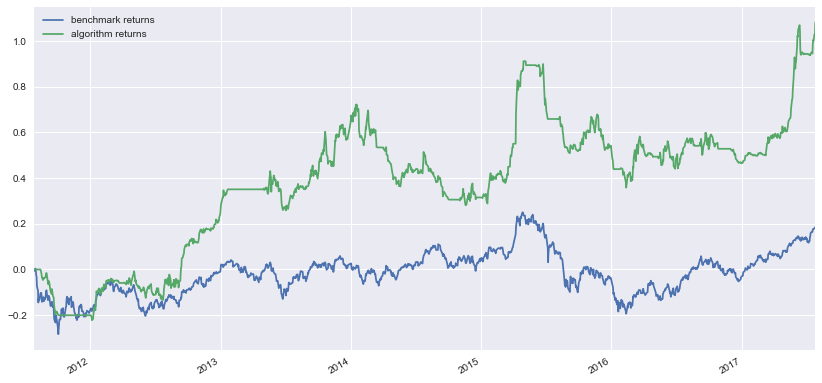

In [20]:
AbuMetricsBase.show_general(*abu_result_tuple, only_show_returns=True)

读者可以看到AbuTwoDayBuy这个策略有多么简单甚至简陋，但是配合AbuLeastPolyWrap进行回测的效果也还可以。

有很多做量化的人声称自己的策略多么复杂，多么nb，里面有多少高科技，但是就是不能对外公布，公布了就没有效果了，还请你原谅它。

在我看来简单的基础策略是最好的，简单策略和复杂策略输出的都只是什么时候买，什么时候卖。

基础策略追求的就应该是简单（可以一句话说明你的基础策略），不要刻意追求复杂的策略，对量化策略失败结果的人工分析，通过外层辅助优化策略，指导策略，让策略自我进行学习，自我调整才是应该追求复杂的地方。

在《量化交易之路》中反复强调：投资的目标需要有一个比较准确的预测结果，投机的目标是获取交易概率优势，量化交易更倾向于投机范畴，预测肯定了确定性，概率优势不需要肯定确定性，对确定性认识的差异导致交易者最终的交易行为产生根本区别，复杂的策略和简单的策略都对应着概率优势，但是对于策略本身复杂的策略并不一定比简单的策略有效。

对于港股交易还有一个相对其它市场特殊的地方，即每手的数量，A股市场每手的数量是定值100，美股一股也可以买卖，港股是每一个交易品种都有自己对应的每手数量，下面使用AbuHkUnit对每手数量进行查询：

In [27]:
unit = AbuHkUnit()
{symbol: unit.query_unit(symbol) for symbol in choice_symbols}

{'hk00656': 500,
 'hk00700': 100,
 'hk01359': 1000,
 'hk02318': 500,
 'hk02333': 500,
 'hk03333': 1000,
 'hk03888': 1000}

可以看到每一个股票的unit都是不同的，在abupy内部会根据资金管理计算出来的买入数量和对应股票的unit进行对比，不满足一手的不能成交，其它市场的实现也类似。

#### abu量化文档目录章节

1. [择时策略的开发](http://www.abuquant.com/lecture/lecture_1.html)
2. [择时策略的优化](http://www.abuquant.com/lecture/lecture_2.html)
3. [滑点策略与交易手续费](http://www.abuquant.com/lecture/lecture_3.html)
4. [多支股票择时回测与仓位管理](http://www.abuquant.com/lecture/lecture_4.html)
5. [选股策略的开发](http://www.abuquant.com/lecture/lecture_5.html)
6. [回测结果的度量](http://www.abuquant.com/lecture/lecture_6.html)
7. [寻找策略最优参数和评分](http://www.abuquant.com/lecture/lecture_7.html)
8. [A股市场的回测](http://www.abuquant.com/lecture/lecture_8.html)
9. [港股市场的回测](http://www.abuquant.com/lecture/lecture_9.html)
10. [比特币，莱特币的回测](http://www.abuquant.com/lecture/lecture_10.html)
11. [期货市场的回测](http://www.abuquant.com/lecture/lecture_11.html)
12. [机器学习与比特币示例](http://www.abuquant.com/lecture/lecture_12.html)
13. [量化技术分析应用](http://www.abuquant.com/lecture/lecture_13.html)
14. [量化相关性分析应用](http://www.abuquant.com/lecture/lecture_14.html)
15. [量化交易和搜索引擎](http://www.abuquant.com/lecture/lecture_15.html)
16. [UMP主裁交易决策](http://www.abuquant.com/lecture/lecture_16.html)
17. [UMP边裁交易决策](http://www.abuquant.com/lecture/lecture_17.html)
18. [自定义裁判决策交易](http://www.abuquant.com/lecture/lecture_18.html)
19. [数据源](http://www.abuquant.com/lecture/lecture_19.html)
20. [A股全市场回测](http://www.abuquant.com/lecture/lecture_20.html)
21. [A股UMP决策](http://www.abuquant.com/lecture/lecture_21.html)
22. [美股全市场回测](http://www.abuquant.com/lecture/lecture_22.html)
23. [美股UMP决策](http://www.abuquant.com/lecture/lecture_23.html)

abu量化系统文档教程持续更新中，请关注公众号中的更新提醒。

#### 《量化交易之路》目录章节及随书代码地址

1. [第二章 量化语言——Python](https://github.com/bbfamily/abu/tree/master/ipython/第二章-量化语言——Python.ipynb)
2. [第三章 量化工具——NumPy](https://github.com/bbfamily/abu/tree/master/ipython/第三章-量化工具——NumPy.ipynb)
3. [第四章 量化工具——pandas](https://github.com/bbfamily/abu/tree/master/ipython/第四章-量化工具——pandas.ipynb)
4. [第五章 量化工具——可视化](https://github.com/bbfamily/abu/tree/master/ipython/第五章-量化工具——可视化.ipynb)
5. [第六章 量化工具——数学：你一生的追求到底能带来多少幸福](https://github.com/bbfamily/abu/tree/master/ipython/第六章-量化工具——数学.ipynb)
6. [第七章 量化系统——入门：三只小猪股票投资的故事](https://github.com/bbfamily/abu/tree/master/ipython/第七章-量化系统——入门.ipynb)
7. [第八章 量化系统——开发](https://github.com/bbfamily/abu/tree/master/ipython/第八章-量化系统——开发.ipynb)
8. [第九章 量化系统——度量与优化](https://github.com/bbfamily/abu/tree/master/ipython/第九章-量化系统——度量与优化.ipynb)
9. [第十章 量化系统——机器学习•猪老三](https://github.com/bbfamily/abu/tree/master/ipython/第十章-量化系统——机器学习•猪老三.ipynb)
10. [第十一章 量化系统——机器学习•ABU](https://github.com/bbfamily/abu/tree/master/ipython/第十一章-量化系统——机器学习•ABU.ipynb)
11. [附录A 量化环境部署](https://github.com/bbfamily/abu/tree/master/ipython/附录A-量化环境部署.ipynb)
12. [附录B 量化相关性分析](https://github.com/bbfamily/abu/tree/master/ipython/附录B-量化相关性分析.ipynb)
13. [附录C 量化统计分析及指标应用](https://github.com/bbfamily/abu/tree/master/ipython/附录C-量化统计分析及指标应用.ipynb)

[更多阿布量化量化技术文章](http://www.abuquant.com/article)


更多关于量化交易相关请阅读[《量化交易之路》](http://www.abuquant.com/books/quantify-trading-road.html)

更多关于量化交易与机器学习相关请阅读[《机器学习之路》](http://www.abuquant.com/books/machine-learning-road.html)

更多关于abu量化系统请关注微信公众号: abu_quant

如有任何问题也可在公众号中联系我的个人微信号。

![](./image/qrcode.jpg)